# Chatbots con [OpenAI](https://platform.openai.com/docs/api-reference)

https://platform.openai.com/usage

In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os

In [3]:
# Cargar variables desde el archivo .env
load_dotenv()

# Acceder a las variables
openai = OpenAI(api_key=os.getenv('OPENAI_API'))

## [Costos](https://openai.com/pricing) [tokenización](https://platform.openai.com/tokenizer)



Ada-(La más rápida) $0.0004 / 1K tokens Es el más rápido de los modelos enumerados, es una opción rentable para aplicaciones donde la velocidad es un factor crítico, como en aplicaciones de servicio al cliente o chatbot.

Babbage $0.0005 / 1K tokens Es un poco más lento que Ada, pero aun así ofrece una opción rápida y eficiente para tareas de procesamiento de lenguaje natural.

Curie $0.0020 / 1K tokens Es más caro que Ada y Babbage. Sin embargo, ofrece capacidades más avanzadas que los modelos más rápidos, lo que lo convierte en una buena opción para aplicaciones que requieren un procesamiento más complejo.

Davinci (el más poderoso) $0.0200 / 1K tokens El modelo más poderoso de la lista es Davinci, que ofrece las capacidades más avanzadas para tareas de procesamiento de lenguaje natural. Sin embargo, es la opción más cara de la lista. Es ideal para aplicaciones donde la precisión y las respuestas matizadas son fundamentales, como en escenarios complejos de atención al cliente o proyectos de investigación. . Ejemplo de calculo del reto: Le pregunte a chat gpt: Menciona las mejores arquitecturas de desarrollo de software.

## Prompt base

### Parametros de Text Completion

model: ID del modelo a utilizar.

prompt: Las solicitudes para generar finalizaciones, codificadas como una cadena, una matriz de cadenas, una matriz de tokens o una matriz de matrices de tokens.

suffix:Predeterminado a nulo El sufijo que viene después de completar el texto insertado.

max_tokens: Predeterminado a 16 El número máximo de tokens a generar en la finalización.

temperature: Predeterminado a 1 Qué temperatura de muestreo usar, entre 0 y 2. Los valores más altos, como 0,8, harán que la salida sea más aleatoria, mientras que los valores más bajos, como 0,2, la harán más enfocada y determinista. Usa esto o top_p pero no ambos.

top_p: Predeterminado a 1 Una alternativa al muestreo con temperatura, llamado muestreo de núcleo, donde el modelo considera los resultados de los tokens con masa de probabilidad top_p. Por lo tanto, 0.1 significa que solo se consideran las fichas que comprenden el 10 % de la masa de probabilidad superior.

n: Predeterminado a 1 Cuántas completions generar para cada prompt. Nota: debido a que este parámetro genera muchas finalizaciones, puede consumir rápidamente su cuota de token. Úselo con cuidado y asegúrese de tener configuraciones razonables para max_tokens y stop.

stream: Predeterminado a falso Ya sea para transmitir el progreso parcial. Si se establece, los tokens se enviarán como eventos enviados por el servidor solo de datos a medida que estén disponibles, y la secuencia terminará con un mensaje de data: [DONE]. Ejemplo en python

logprobs: Si logprobs es 5, la API devolverá una lista de los 5 tokens más probables. La API siempre devolverá el logprob del token muestreado, por lo que puede haber hasta logprobs+1 elementos en la respuesta.

echo: Repita el prompt además de la finalización(Predeterm: Falso)

stop: Hasta 4 secuencias donde la API dejará de generar más tokens. El texto devuelto no contendrá la secuencia de parada.

best_of: Predeterminado a 1 Genera el mejor de completions del lado del servidor y devuelve el "mejor" (el que tiene la mayor probabilidad de registro por token). Los resultados no se pueden transmitir(stream).

user: Un identificador único que representa a su usuario final, que puede ayudar a OpenAI a monitorear y detectar abusos.

In [23]:
prompt = "¿Quien descubrió américa?"

In [30]:
response = openai.completions.create(
  model="text-davinci-003",
  prompt=prompt,
  temperature=0.8, # Definir la libertad o restricciones del modelo (0-1)
  max_tokens=60, # Buena práctica para limitar la respuesta
  top_p=1, # Porcentaje de respuestas que se quiere dar
  n=2, # Numero de respuestas que queremos que nos den
  frequency_penalty=0.5,
  presence_penalty=0
)

In [31]:
response.choices[0].text

'\n\nDescubrir América es atribuido generalmente al explorador español Cristóbal Colón. Sin embargo, este llegó a las costas del continente en 1492, lo que significa que se establecieron varios'

In [32]:
response.choices[1].text

'\n\nEl descubrimiento de América fue hecho por Cristóbal Colón en 1492.'

## Roles (ChatCompletion)

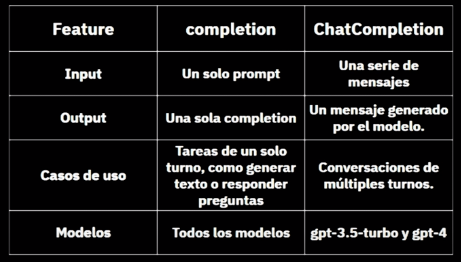

In [8]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[ # Dar mensajes de ejemplo para definir el flujo
        {"role":"system", "content":"Eres un asistente virtual que da información sobre recetas de cocina"},
        {"role":"user", "content":"¿Qué tipo de postres son los más cocinados?"},
        {"role":"assistant", "content":"Los postres más populares son: Pasteles, Tartas, Galletas y Helados"},
        {"role":"user", "content":"¿De dónde se origina el helado?"}
    ]
)

In [9]:
response.choices[0].message.content

'El helado tiene una larga historia que se remonta a la antigua China, aproximadamente en el año 200 a.C. Se dice que los chinos mezclaban nieve con frutas y leche para crear una especie de postre frío. Esta técnica se fue difundiendo a través de la Ruta de la Seda y llegó a Europa en la Edad Media. Fue en Italia donde empezaron a perfeccionar el helado, añadiendo ingredientes como azúcar y vainilla. Desde entonces, el helado ha evolucionado y se ha convertido en uno de los postres más populares y versátiles en todo el mundo.'

In [10]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[ # Dar mensajes de ejemplo para definir el flujo
        {"role":"system", "content":"Eres un asistente virtual que da información sobre recetas de cocina"},
        {"role":"user", "content":"¿Qué tipo de postres son los más cocinados?"},
        {"role":"assistant", "content":"Los postres más populares son: Pasteles, Tartas, Galletas y Helados"},
        {"role":"user", "content":"¿De dónde se origina el helado?"}
    ],
    temperature=0.2
)

In [11]:
response.choices[0].message.content

'El helado tiene una larga historia y su origen se remonta a la antigua China, donde se crearon las primeras versiones de helado hace más de 2,000 años. Se dice que los chinos mezclaban leche con arroz y la enfriaban con nieve para crear una especie de postre helado. Esta técnica se fue difundiendo a través de la Ruta de la Seda y llegó a Europa en la Edad Media. En Italia, se comenzaron a agregar sabores como frutas y especias, y se le dio la consistencia cremosa que conocemos hoy en día. Desde entonces, el helado se ha convertido en un postre muy popular en todo el mundo.'

## Adivinanza

In [16]:
import random

def get_clue():
    words = ["elefante", "leon", "jirafa", "hipopótamo", "mono"]
    random_word = random.choice(words)
    prompt = "Adivina la palabra en la que esto pensando. Es un animal que vive en la selva."
    return prompt, random_word

def check_answer(user_input, answer):
    return user_input == answer

def give_property(animal):
    response = openai.completions.create(
        model = "text-davinci-003",
        prompt= f"Dame una característica del tipo animal {animal}, pero jamás me digas el nombre del animal",
        max_tokens=100
    )
    return response.choices[0].text

def play_game():
    prompt, answer = get_clue()
    print(prompt)
    while True:
        user_input = input("Ingresa tu respuesta: ")
        if check_answer(user_input, answer):
            print(f"Correcto, el animal era {user_input}")
            break
        else:
            print("Respuesta incorrecta, vuelve a intentarlo")
            print(give_property(answer))

In [19]:
play_game()

Adivina la palabra en la que esto pensando. Es un animal que vive en la selva.
Respuesta incorrecta, vuelve a intentarlo


Es un animal de gran tamaño con orejas grandes y una trompa larga.
Correcto, el animal era elefante


## Fine-tuning

El proceso de fine-tuning implica re-entrenar parcialmente el modelo pre-entrenado con el nuevo conjunto de datos, utilizando una tasa de aprendizaje más baja que la utilizada en el entrenamiento original. Esto permite que el modelo se adapte mejor a la tarea específica y a las características únicas de los datos de esa tarea en particular, sin perder completamente el conocimiento general aprendido durante su entrenamiento original.

### Reglas básicas para un correcto formato de datos para fine tuning

Cada prompt debe terminar con un separador fijo con esto el modelo entiende donde termina la solicitud \n\n###\n\n.

Cada completion debe comenzar con un espacio en blanco para un correcto proceso de tokenización.

Cada completion debe terminar con una secuencia para que el modelo entienda donde termina o finaliza el proceso \n o ###.

Se debe utilizar la misma estructura de prompt con la que fue entrenado.

### [Preparar los datos de entrenamiento](https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset)

In [ ]:
!python -m openai tools fine_tunes.prepare_data -f data/prompts_cursos.csv

In [40]:

# 2. Upload a training file
response_upload = openai.files.create(
    file=open("./data/prompts_cursos_prepared.jsonl", "rb"),
    purpose="fine-tune"
)

fine_tune_id = response_upload.id

print(response_upload)

# 3. Create a fine-tuned model
response_train = openai.fine_tuning.jobs.create(
    training_file=fine_tune_id,
    model="davinci-002" # Cost: $0.0020 / 1K tokens
)

fine_tunning_job_id = response_train.id

print(response_train)

# 4. Esperar, yo me arme el siguiente comando, para ejecutar cada unos minutos y revisar
current_status = openai.fine_tuning.jobs.retrieve(fine_tunning_job_id)

print(f" id: {current_status.id} \n status: {current_status.status} \n created_at: {current_status.created_at} \n trained_tokens: {current_status.trained_tokens}")

"""
Si investigan la documentacion que deje mas arriba, openai explica como cancelar o eliminar jobs.

El costo total de entrenar en davinci-002 me salio $0.23 dolares  
"""

FileObject(id='file-I2kYGJYL6L2M5Im0Gm013xkD', bytes=49731, created_at=1701981547, filename='prompts_cursos_prepared.jsonl', object='file', purpose='fine-tune', status='uploaded', status_details=None)


BadRequestError: Error code: 400 - {'error': {'message': 'Fine-tuning jobs cannot be created on an Explore plan. You can upgrade to a paid plan on your billing page: https://platform.openai.com/account/billing/overview', 'type': 'invalid_request_error', 'param': None, 'code': 'exceeded_quota'}}